# Importing the libraries

In [49]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [50]:
df = pd.read_csv(r"C:\Users\Ketan\Downloads\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Performing Exploratory data analysis

In [51]:
df.shape

(568454, 10)

In [79]:
df1 = df.sample(frac= 0.20,replace = True).reset_index(drop = True)
print(df1.shape)

(113691, 10)


In [52]:
df1.head()

(113691, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,345772,B00433YTRA,A2GGKZ6PMWXZ3P,"sandy, like the beach",3,5,2,1302220800,Stronger flavor than most,Be aware that Amazon LLC does not include ice ...
1,323470,B004QVAZ9U,A26ZQUATEV1CQI,"Sharon ""sharon""",1,1,5,1337904000,my dogs LOVE it,I just started my dogs on this food 3 days ago...
2,196905,B008JKTTUA,A1Z8ENYSB5AU74,Christianne,2,2,5,1344643200,KIND PLUS Dark Chocolate Cherry Cashew Bars,This review is for the DARK CHOCOLATE CHERRY C...
3,359490,B007M832YY,A3M3CXC2I4JW9T,dab1231,0,0,5,1319760000,Buy them people!,I am so happy to have discovered these chips. ...
4,43567,B001EQ4P2I,A3GV75YMLZA87O,Nora,2,2,5,1254787200,Love These Nuts,Great flavor. I have always ordered Blue Diamo...


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113689 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113688 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [54]:
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               2
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   3
Text                      0
dtype: int64

In [55]:
# Dropping rows containg Null Values
df1.dropna(inplace= True)
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [56]:
# calculating rating percentage
df1['Score'].value_counts()
rating_pct = df1['Score'].value_counts()/len(df) * 100
rating_pct

5    12.771834
4     2.841215
1     1.803136
3     1.517977
2     1.064994
Name: Score, dtype: float64

### Visualisation showing highest rating percentage

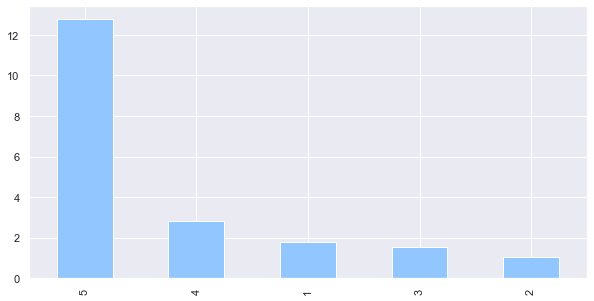

In [57]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
plt.style.use('seaborn-pastel')
rating_pct.plot.bar()
plt.show()

# Data Preprocessing and Transformation

In [58]:
df1 = pd.DataFrame(df1,columns = ['Score','Text'])
df1.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [59]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [60]:
df1['Sentiment'] = df1['Rating'].apply(apply_sentiment)
df1.drop(['Rating'],axis = 1, inplace = True)

In [61]:
sentiment = df1['Sentiment'].value_counts()
sentiment

1    97382
0    16304
Name: Sentiment, dtype: int64

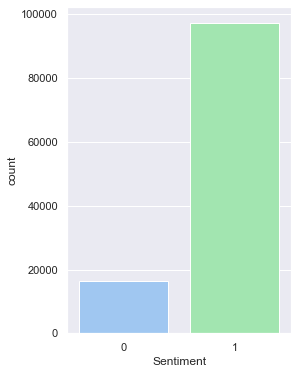

In [62]:
plt.figure(figsize = (4,6))
sns.countplot(data = df1, x = 'Sentiment')
plt.show()

In [63]:
df1['Review']

0         Be aware that Amazon LLC does not include ice ...
1         I just started my dogs on this food 3 days ago...
2         This review is for the DARK CHOCOLATE CHERRY C...
3         I am so happy to have discovered these chips. ...
4         Great flavor. I have always ordered Blue Diamo...
                                ...                        
113686    I've seen the KIND brand bars in stores but ne...
113687    I have been eating this cereal since it first ...
113688    It was great to have available the exact produ...
113689    I'm a big fan of Tasty Bite and I've tried a l...
113690    "... organic dark chocolate chips (organic sug...
Name: Review, Length: 113686, dtype: object

# Importing Deep learning libraries

In [64]:
import re 
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
# Cleaning Text data by removing punctuations and Urls 
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [66]:
df1['Review'] = df1['Review'].apply(clean_text)
df1.head()

,Review,Sentiment
0,be aware that amazon llc does not include ice ...,0
1,i just started my dogs on this food days ago ...,1
2,this review is for the dark chocolate cherry c...,1
3,i am so happy to have discovered these chips i...,1
4,great flavor i have always ordered blue diamon...,1


### Now, spliting sentences into words, & removing gramatically incorrect words and common words

In [81]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df1['Review'][0]


words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df1['reviews_text'] = df1['Review'].apply(lambda row: remove_stopword(stop_words, row))

## we need to convert list into string
df1['reviews_text'] = df1['reviews_text'].apply(lambda row: ','.join(row))

In [68]:
df1.head(3)

,Review,Sentiment,reviews_text
0,be aware that amazon llc does not include ice ...,0,"aware,amazon,llc,include,ice,packs,packaging,r..."
1,i just started my dogs on this food days ago ...,1,"started,dogs,food,days,ago,love,trying,add,thi..."
2,this review is for the dark chocolate cherry c...,1,"review,dark,chocolate,cherry,cashew,flavor,onl..."


# Devloping Naive Bayes Model

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [70]:
# Creating variables

X = df1['reviews_text']
y = df1['Sentiment']

In [71]:
# Spliting the data into train(80%) and test(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size = 0.20)

print('For X:-','Train dataset :',X_train.shape,',','Test dataset :',X_test.shape)
print('For y:-','Train dataset :',y_train.shape,',','Test dataset :',y_test.shape)

For X:- Train dataset : (90948,) , Test dataset : (22738,)
For y:- Train dataset : (90948,) , Test dataset : (22738,)


In [72]:
fit_model = clf.fit(X_train,y_train)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.8591392883845714
Test accuracy: 0.8583428621690562


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[   29  3217]
 [    4 19488]]


<AxesSubplot:>

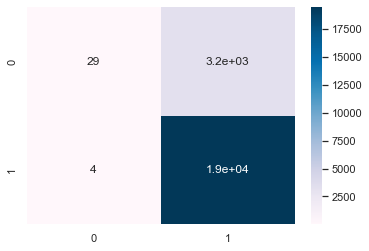

In [77]:
sns.heatmap(cm, cmap="PuBu", annot=True)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.01      0.02      3246
           1       0.86      1.00      0.92     19492

    accuracy                           0.86     22738
   macro avg       0.87      0.50      0.47     22738
weighted avg       0.86      0.86      0.79     22738

